
## **Driver Drowsiness Detection System**

**Introduction on Drowsiness Detection System**

Drowsiness detection systems have become increasingly important in preventing road accidents caused by driver fatigue. With long drives, it is common for drivers to become drowsy and even fall asleep behind the wheel. In this Project, we will explore the development of a drowsiness detection system that can promptly alert the driver when signs of drowsiness are detected.

Drowsiness detection systems utilize visual methods to identify signs of drowsiness, such as eye detection, yawning, and nodding.

In [ ]:
#Importing required libraries.

import numpy as np
import pandas as pd 
import os
import cv2

# **Requirements**

●**OpenCV**: OpenCV is a great tool for image processing and performing many computer vision tasks. It is an open-source library that can be used to perform tasks like face detection, object tracking, and many more tasks.

●**TensorFlow**: Tensorflow is a free and open-source library, developed by the Google Brain team for machine learning and artificial intelligence. Tensorflow has a particular focus on the training and inference of deep neural networks.

●**Keras**: Keras is an open-source software library and it provides a Python interface for artificial neural networks. Keras is more user-friendly because it is an inbuilt python library.

# Install required libraries

In [ ]:
!pip install opendatasets 
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Downloading DataSets from Kaggle

In [ ]:
import opendatasets as od
import pandas

od.download(
	"https://www.kaggle.com/datasets/dheerajperumandla/drowsiness-dataset")



Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: stanbatman
Your Kaggle Key: ··········


100%|██████████| 161M/161M [00:08<00:00, 20.8MB/s]


In [ ]:
od.download('https://www.kaggle.com/datasets/adinishad/prediction-images')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: stanbatman
Your Kaggle Key: ··········


100%|██████████| 1.18M/1.18M [00:01<00:00, 1.16MB/s]

##Listing Labels for Driver Drowsiness Detection Dataset using Python's os Module

In [ ]:
labels = os.listdir("./drowsiness-dataset/train")

In [ ]:
labels

['yawn', 'no_yawn', 'Open', 'Closed']

# Random Image from the Dataset
This helps us check whether we are able to access the images in the dataset or not

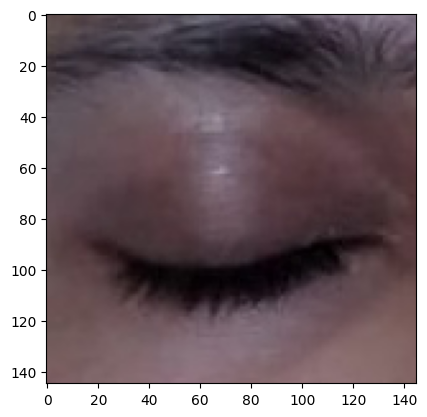

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./drowsiness-dataset/train/Closed/_20.jpg"))

Storing a random image in the variable 'a' as a numpy array 

In [ ]:
a = plt.imread("./drowsiness-dataset/train/yawn/15.jpg")

Shape of the numpy array a

In [ ]:
a.shape

(480, 640, 3)

## Image from the YawDD Dataset
Image below : Yawn Label

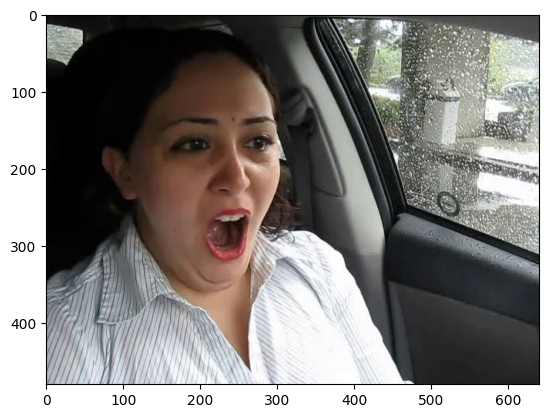

In [ ]:
plt.imshow(plt.imread("./drowsiness-dataset/train/yawn/109.jpg"))

Here, we are processing a driver drowsiness detection image dataset. It detects faces in the "yawn" and "no_yawn" image categories using OpenCV and resizes the detected regions of interest to 145x145 pixels. The resized image arrays, along with their class labels (0 or 1), are stored in a list called `yaw_no`. The function returns this list for all images in the specified directory.

In [ ]:
def face_for_yawn(direc="./drowsiness-dataset/train", face_cas_path="./prediction-images/haarcascade_frontalface_default.xml"):
    yaw_no = []  # create an empty list to store image arrays and their respective class numbers
    IMG_SIZE = 145  # define the size of the image to be resized to
    categories = ["yawn", "no_yawn"]  # define the categories of the images
    for category in categories:
        path_link = os.path.join(direc, category)  # create a path to the directory of each category
        class_num1 = categories.index(category)  # assign a unique class number to each category
        print(class_num1)  # print the class number for debugging purposes
        for image in os.listdir(path_link):  # loop through all the images in the directory
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)  # read the image and store it as an array
            face_cascade = cv2.CascadeClassifier(face_cas_path)  # load the face cascade classifier
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)  # detect all faces in the image
            for (x, y, w, h) in faces:  # loop through all the detected faces
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)  # draw a rectangle around the face
                roi_color = img[y:y+h, x:x+w]  # crop the image to only include the face
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))  # resize the cropped image to the desired size
                yaw_no.append([resized_array, class_num1])  # add the resized image and its class number to the list
    return yaw_no  # return the list of resized images and their class numbers


yawn_no_yawn = face_for_yawn()  # call the face_for_yawn function and store the result in yawn_no_yawn variable


0
1


We've defined a function that reads in driver drowsiness detection images from a specified directory. The function iterates over the "Closed" and "Open" categories of images, resizes each image array to 145x145 pixels, and appends it with its corresponding class label (2 or 3 for "Closed" or "Open", respectively) to a list called `data`. The function returns the `data` list containing all the resized images with their corresponding class labels for all the images in the specified directory.

In [ ]:
# This function is getting data from a directory
# It is using a Haar cascade for face detection and eye detection
# It is resizing the images to a specified size and appending the resized image and its label to a list
# The function returns the list of data
def get_data(dir_path="./drowsiness-dataset/train/", face_cas="./prediction-images/haarcascade_frontalface_default.xml", eye_cas="./prediction-images/haarcascade.xml"):
    # Define the labels for the data
    labels = ['Closed', 'Open']
    # Define the size of the images after resizing
    IMG_SIZE = 145
    # Create an empty list to store the data
    data = []
    # Loop through each label in the labels list
    for label in labels:
        # Define the path to the label's directory
        path = os.path.join(dir_path, label)
        # Get the index of the label in the labels list
        class_num = labels.index(label)
        # Add 2 to the class number to account for the additional classes for face and eyes
        class_num += 2
        # Loop through each image in the label's directory
        for img in os.listdir(path):
            try:
                # Read in the image and resize it
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                # Append the resized image and its label to the data list
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    # Return the list of data
    return data


In [ ]:
data_train = get_data()

2
3


## Appending yawn and non-yawn face images to the existing dataset

In [ ]:
def append_data():
    # call the `face_for_yawn()` function to get yawning and non-yawning face images
    yaw_no = face_for_yawn()
    
    # call the `get_data()` function to get open and closed eye images
    data = get_data()
    
    # combine the two datasets into a single list using the `extend()` method
    yaw_no.extend(data)
    
    # convert the resulting list to a NumPy array and return it
    return np.array(yaw_no)


In [ ]:
new_data = append_data()

0
1
2
3


<ipython-input-22-be15ac3ad549>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


##Creating feature and label lists from the dataset

In [ ]:
# Initialize empty lists to store features and labels
X = []
y = []

# Iterate over each tuple of feature and label in the new_data list
for feature, label in new_data:
    
    # Append the feature to the X list
    X.append(feature)
    
    # Append the label to the y list
    y.append(label)


###Reshaping the feature array to be compatible with the input shape of the deep learning model.






In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

### One-hot encoding the labels using scikit-learn's LabelBinarizer






In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

## Converting y(Labels) to a numpy array.






In [ ]:
y = np.array(y)

## Splitting data into training and testing sets 

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# Importing Neccessary Modules

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [ ]:
# Import necessary modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add convolutional layers with ReLU activation and MaxPooling layers
model.add(Conv2D(512, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

# Flatten the output and add a Dropout layer
model.add(Flatten())
model.add(Dropout(0.5))

# Add Dense layers with ReLU activation and a Softmax output layer
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

# Compile the model with categorical cross-entropy loss, accuracy metric, and Adam optimizer
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 512)     14336     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 512)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 512)       2359808   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 512)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 256)       1179904   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 256)      0

##Training the model

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 40s 376ms/step - loss: 1.3074 - accuracy: 0.3667 - val_loss: 1.0514 - val_accuracy: 0.3910
Epoch 2/50
43/43 [==============================] - 15s 343ms/step - loss: 0.8831 - accuracy: 0.6355 - val_loss: 0.5808 - val_accuracy: 0.7578
Epoch 3/50
43/43 [==============================] - 15s 347ms/step - loss: 0.5477 - accuracy: 0.7699 - val_loss: 0.3181 - val_accuracy: 0.8356
Epoch 4/50
43/43 [==============================] - 14s 326ms/step - loss: 0.3985 - accuracy: 0.8330 - val_loss: 0.2839 - val_accuracy: 0.9135
Epoch 5/50
43/43 [==============================] - 15s 351ms/step - loss: 0.3128 - accuracy: 0.8723 - val_loss: 0.2933 - val_accuracy: 0.8581
Epoch 6/50
43/43 [==============================] - 14s 330ms/step - loss: 0.3202 - accuracy: 0.8760 - val_loss: 0.2156 - val_accuracy: 0.8720
Epoch 7/50
43/43 [==============================] - 15s 356ms/step - loss: 0.2446 - accuracy: 0.8983 - val_loss: 0.2057 - val_accuracy: 0.8979

# Plots
#### 1. Accuracy ( Training vs Testing)
#### 2. Loss ( Training vs Testing)

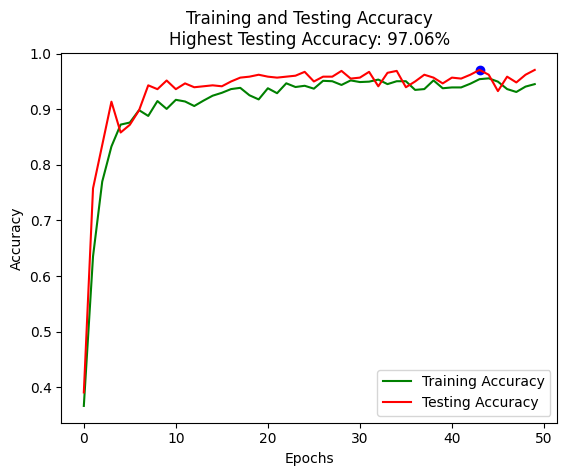

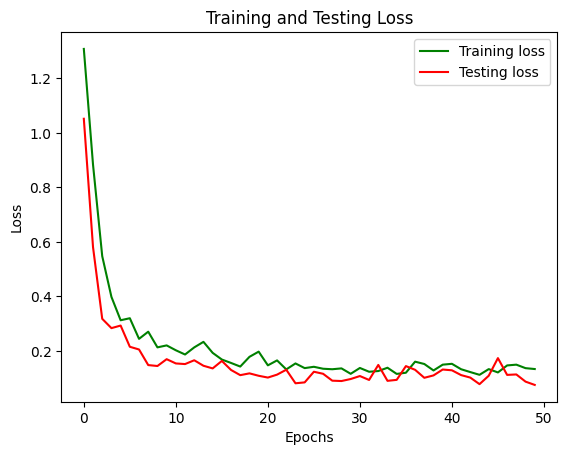

In [ ]:
# Extracting the accuracy and loss values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Finding the index and value of the highest testing accuracy
max_val_acc = max(val_accuracy)
max_val_acc_index = val_accuracy.index(max_val_acc)

# Plotting the highest testing accuracy as a point on the accuracy plot
plt.plot(max_val_acc_index, max_val_acc, marker='o', color='blue')

# Plotting the training and testing accuracy over epochs
plt.plot(epochs, accuracy, "g", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "r", label="Testing Accuracy")
plt.legend()
plt.title("Training and Testing Accuracy\nHighest Testing Accuracy: {:.2f}%".format(max_val_acc*100))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

# Plotting the training and testing loss over epochs
plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "r", label="Testing loss")
plt.legend()
plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


##Maximum Accuracy and Minimum Loss

In [ ]:
from tabulate import tabulate

# create a list of lists containing the metric names and their values
table = [["Maximum Testing accuracy:", f"\033[1;32m{max_val_accuracy:.4f}\033[0m"],
         ["Maximum Training accuracy:", f"\033[1;32m{max_accuracy:.4f}\033[0m"],
         ["Minimum Training Loss:", f"\033[1;31m{min_loss:.4f}\033[0m"],
         ["Minimum Testing Loss:", f"\033[1;31m{min_val_loss:.4f}\033[0m"]]

# print the table using tabulate, with "Metric" and "Value" as headers and "fancy_grid" as the table format
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))


╒════════════════════════════╤═════════╕
│ Metric                     │   Value │
╞════════════════════════════╪═════════╡
│ Maximum Testing accuracy:  │  0.9706 │
├────────────────────────────┼─────────┤
│ Maximum Training accuracy: │  0.9555 │
├────────────────────────────┼─────────┤
│ Minimum Training Loss:     │  0.1128 │
├────────────────────────────┼─────────┤
│ Minimum Testing Loss:      │  0.0758 │
╘════════════════════════════╧═════════╛


# *Saving the Model*

In [ ]:
model.save("drowiness_new6.h5")

In [ ]:
model.save("drowiness_new6.model")

 ## Using model.predict() and argmax() to get predicted classes

In [ ]:
# Make predictions on test data
preds = model.predict(X_test)

# Get the index of the predicted class with highest probability for each sample
predicted_classes = preds.argmax(axis=1)


19/19 [==============================] - 2s 87ms/step


In [ ]:
predicted_classes # Get the index of the predicted class with highest probability for each sample


array([0, 3, 2, 3, 1, 3, 3, 1, 1, 2, 3, 3, 3, 2, 2, 2, 3, 0, 1, 3, 3, 3,
       2, 1, 1, 2, 3, 2, 3, 3, 3, 0, 3, 2, 0, 3, 3, 2, 1, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 2, 2, 2, 0, 3, 3, 1, 0, 2, 3,
       2, 3, 2, 2, 1, 3, 3, 3, 2, 0, 0, 3, 1, 3, 2, 0, 3, 2, 2, 2, 2, 1,
       3, 3, 2, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 1, 3, 1, 2, 3, 2, 1, 0, 2,
       1, 1, 2, 1, 0, 3, 3, 3, 2, 0, 3, 3, 3, 1, 1, 2, 3, 3, 2, 0, 3, 3,
       1, 3, 1, 2, 3, 3, 2, 1, 2, 0, 0, 1, 3, 2, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 1, 0, 3, 1, 3, 2, 2, 3, 1, 3, 3, 2, 3, 2, 3, 1, 2, 0, 3, 3,
       2, 3, 0, 2, 3, 1, 2, 1, 3, 2, 3, 1, 3, 0, 1, 3, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 1, 2, 0, 0, 1, 2, 0, 2, 0, 3, 1, 3, 2, 2, 2, 1, 3, 1, 1,
       1, 0, 3, 3, 3, 3, 3, 0, 1, 2, 0, 0, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0,
       1, 1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 0, 2, 2, 2, 0, 3, 3, 2, 2,
       3, 2, 2, 0, 0, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 0, 3, 3, 3, 3, 2,
       2, 1, 2, 2, 2, 3, 2, 0, 1, 3, 1, 3, 2, 3, 1,

# Classification Report
Here we are printing the classification report which includes metrics such as precision, recall, f1-score, and support for each class. It takes in the true labels of the test set, predicted labels, and the target names of the labels. This report gives an idea of how well our model is performing on each class of the dataset.

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.76      0.81      0.78        63
     no_yawn       0.80      0.99      0.88        74
      Closed       0.99      0.80      0.89       215
        Open       0.91      0.99      0.94       226

    accuracy                           0.90       578
   macro avg       0.87      0.90      0.88       578
weighted avg       0.91      0.90      0.90       578



 # Loading and preparing the drowsiness detection model to test on random images

In [ ]:
# Define the label names and image size
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145

# Define a function to preprocess the image
def prepare(filepath, face_cas="./prediction-images/haarcascade_frontalface_default.xml"):
    # Read in the image
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    # Normalize the pixel values to be between 0 and 1
    img_array = img_array / 255
    # Resize the image to match the size used during training
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    # Reshape the image to match the input shape expected by the model
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

# Load the trained model
model = tf.keras.models.load_model("./drowiness_new6.h5")


# Prediction Labels

> 0 = Yawning is Detected

> 1 = Yawning is not Dectected

> 2 = Eyes are closed

> 3 = Eyes are open




In [ ]:
def get_label(prediction_label):
    if prediction_label == 0:
        print("STAY ALERT! YOU'RE DOZING OFF!")
        print("Yawning Detected")
    elif prediction_label == 1:
        print("No Yawning Detected")
    elif prediction_label == 2:
        print("STAY ALERT! YOU'RE DOZING OFF!")
        print("Eyes are closed")
    elif prediction_label == 3:
        print("Eyes are open")
    else:
        raise ValueError("Invalid index")

In [ ]:
!pip install playsound==1.2.2

In [ ]:
!pip install pygobject

##Playing Alarm Sound When Driver is Drowsy
We have created a function named `play_alarm()` to play an alarm sound when the driver is predicted to be drowsy. The function takes the `prediction_label` as an argument, which is either 0 or 2 (i.e., closed eyes or yawn). If the `alarm_path` exists, the `playsound()` function from the `playsound` library is used to play the alarm sound. Finally, we print "ALERT! ALARM PLAYED" if the sound is played, and "Alarm sound file not found." if the file is not found.

In [ ]:
import os
import playsound

# Define a function to play the alarm based on the prediction label
def play_alarm(prediction_label):
    # If the prediction label indicates drowsiness or closed eyes, play the alarm sound
    if prediction_label == 0 or prediction_label == 2:
        # Specify the path of the alarm sound file
        alarm_path = "/content/beep-warning-6387.mp3" 
        # Check if the file exists at the specified path
        if os.path.exists(alarm_path):
            # Play the alarm sound using the playsound library
            playsound.playsound(alarm_path)
            # Print a message indicating that the alarm has been played
            print("ALERT! ALARM PLAYED")
        else:
            # If the file does not exist, print a message indicating that the file is not found
            print("Alarm sound file not found.")


##Function to Capture Image from Camera

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

##Capture Image and pass it to model

In [ ]:
from IPython.display import Image
try:
  filename = take_photo(filename='sample_image.png')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('sample_image.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)


##Prepare and pass image to Model

In [ ]:

prediction = model.predict([prepare("sample_image.png")])
prediction_label = np.argmax(prediction)

print(prediction_label)
        
get_label(prediction_label)
play_alarm(prediction_label)


1/1 [==============================] - 0s 20ms/step
1
No Yawning Detected


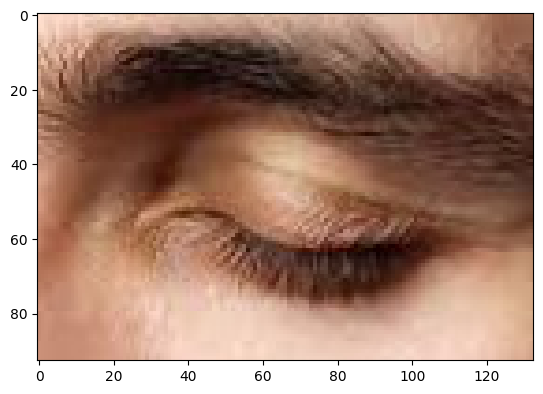

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("./drowsiness-dataset/train/Closed/_34.jpg"))

In [ ]:
prediction = model.predict([prepare("./drowsiness-dataset/train/Closed/_34.jpg")])
prediction_label = np.argmax(prediction)
print(prediction_label)


        
get_label(prediction_label)
play_alarm(prediction_label)

1/1 [==============================] - 0s 21ms/step
2
STAY ALERT! YOU'RE DOZING OFF!
Eyes are closed
ALERT! ALARM PLAYED


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
plt.imshow(plt.imread("./drowsiness-dataset/train/Open/_104.jpg"))

In [ ]:
prediction = model.predict([prepare("./drowsiness-dataset/train/Open/_104.jpg")])
prediction_label = np.argmax(prediction)
print(prediction_label)
get_label(prediction_label)

1/1 [==============================] - 0s 19ms/step
3
Eyes are open


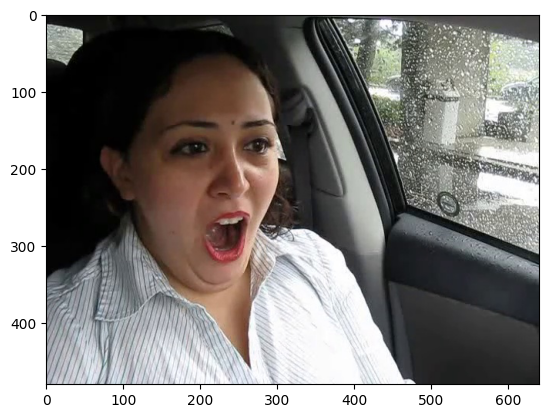

In [ ]:
plt.imshow(plt.imread("./drowsiness-dataset/train/yawn/107.jpg"))

In [ ]:
prediction = model.predict([prepare("./drowsiness-dataset/train/yawn/119.jpg")])
prediction_label1 = np.argmax(prediction)
print(np.argmax(prediction))      
get_label(prediction_label1)

1/1 [==============================] - 0s 19ms/step
0
STAY ALERT! YOU'RE DOZING OFF!


'Yawning Detected'

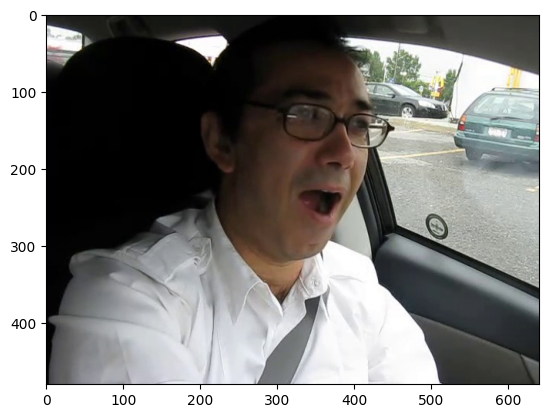

In [ ]:
plt.imshow(plt.imread("./drowsiness-dataset/train/yawn/113.jpg"))

In [ ]:
prediction = model.predict([prepare("./drowsiness-dataset/train/yawn/113.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 18ms/step


0

In [ ]:
prediction_label1 = np.argmax(prediction)
print(np.argmax(prediction))
get_label(prediction_label1)
play_alarm(prediction_label1)

0
STAY ALERT! YOU'RE DOZING OFF!
Yawning Detected


##Network Architecture Diagram

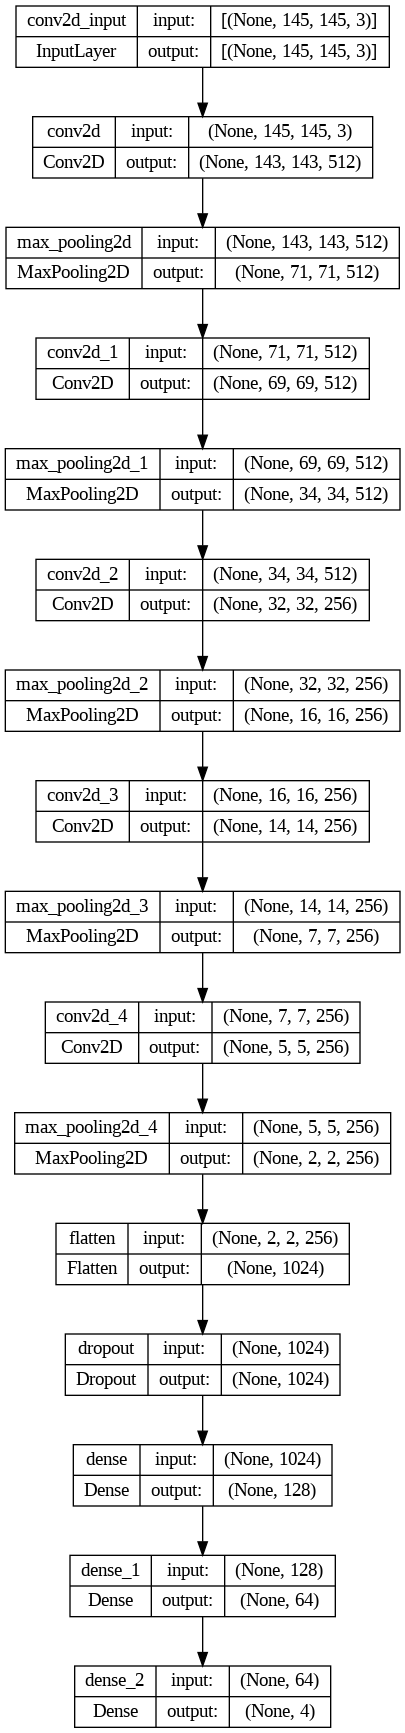

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 56.3 MB/s eta 0:00:00


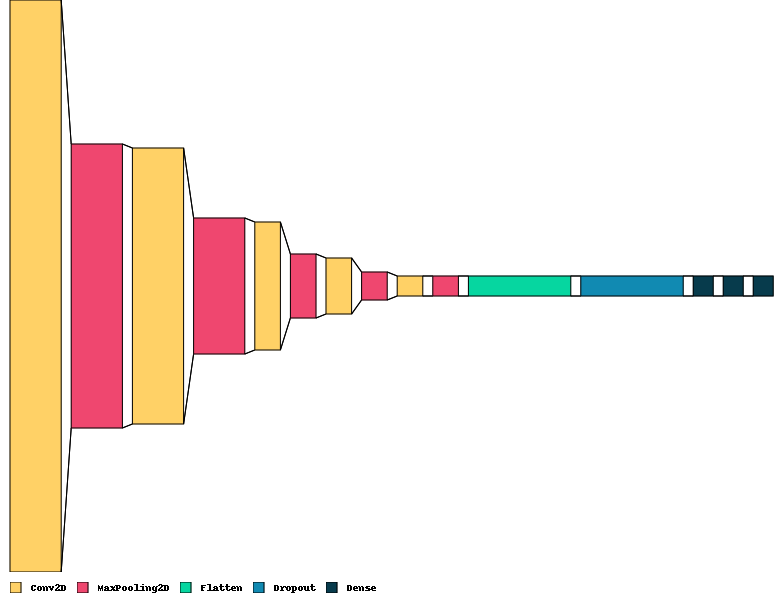

In [ ]:
import visualkeras
visualkeras.layered_view(model, legend=True, draw_volume=False)
